In [ ]:
#from google.colab import drive
#drive.mount('C:/AI')

In [ ]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [ ]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
from tensorflow.keras.initializers import lecun_normal # Инициализатор
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # Масштабирование данных
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression

In [ ]:
from keras.models import load_model

In [ ]:
import re
from tabulate import tabulate
pd.set_option("display.max_columns", 100)

##Подключение баз.

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/1_class_new.csv', low_memory=False)# таблица 1 класс новая
df1.shape

(1626522, 44)

In [ ]:
df1.dtypes

owner_id                                object
contract_id                             object
mark_kind                               object
issue_dt                                object
close_dt                                object
region_name                             object
city_name                               object
population                             float64
date_of_birth                           object
gender                                  object
education                               object
position                                object
dt_nbki                                 object
id_nbki                                 object
issued                                  object
amount                                 float64
currency                                object
type_credit                             object
status_credit                           object
period                                  object
period_interest                         object
psk          

In [ ]:
df2 = pd.read_excel('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/res_dashbrd01_2668_2class.xlsx')# таблица 2 класс
df2.shape

(1048574, 46)

In [ ]:
df2.dtypes

owner_id                                       object
contract_id                                    object
mark_kind                                      object
issue_dt                               datetime64[ns]
close_dt                               datetime64[ns]
region_name                                    object
city_name                                      object
population                                    float64
date_of_birth                          datetime64[ns]
gender                                         object
education                                      object
position                                       object
dt_nbki                                datetime64[ns]
id_nbki                                        object
issued                                 datetime64[ns]
amount                                        float64
currency                                       object
type_credit                                    object
status_credit               

In [ ]:
print('Пропусков volume_commitment: ', df2['volume_commitment'].isnull().sum())
print(df2['volume_commitment'].unique())
print('Пропусков type_debt:', df2['type_debt'].isnull().sum())
df2['type_debt'].unique()

Пропусков volume_commitment:  1046661
[nan 'Полностью' 'Частично']
Пропусков type_debt: 1024912


array([nan, 'ПоОсновномуДолгу', 'СУчетомПроцентовИПеней'], dtype=object)

In [ ]:
df3 = pd.read_excel('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/res_dashbrd01_2669_3class.xlsx')# таблица 3 класс
df3.shape


(550590, 46)

In [ ]:
print('Пропусков volume_commitment: ', df3['volume_commitment'].isnull().sum())
print(df3['volume_commitment'].unique())
print('Пропусков type_debt:', df3['type_debt'].isnull().sum())
df3['type_debt'].unique()

Пропусков volume_commitment:  549018
[nan 'Полностью' 'Частично']
Пропусков type_debt: 538889


array([nan, 'ПоОсновномуДолгу', 'СУчетомПроцентовИПеней'], dtype=object)

In [ ]:
df4 = pd.read_excel('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/res_dashbrd01_2670_4class.xlsx')# таблица 4 класс
df4.shape

(751998, 46)

In [ ]:
print('Пропусков volume_commitment: ', df4['volume_commitment'].isnull().sum())
print(df4['volume_commitment'].unique())
print('Пропусков type_debt:', df4['type_debt'].isnull().sum())
df4['type_debt'].unique()

Пропусков volume_commitment:  751156
[nan 'Полностью' 'Частично']
Пропусков type_debt: 653796


array([nan, 'ПоОсновномуДолгу', 'СУчетомПроцентовИПеней'], dtype=object)

In [ ]:
df2 = df2.drop(['volume_commitment'], axis='columns') # Удаляем колонку 'volume_commitment' в df2
df2 = df2.drop(['type_debt'], axis='columns') # Удаляем колонку 'type_debt' в df2
df3 = df3.drop(['volume_commitment'], axis='columns') # Удаляем колонку 'volume_commitment' в df3
df3 = df3.drop(['type_debt'], axis='columns') # Удаляем колонку 'type_debt' в df3
df4 = df4.drop(['volume_commitment'], axis='columns') # Удаляем колонку 'volume_commitment' в df4
df4 = df4.drop(['type_debt'], axis='columns') # Удаляем колонку 'type_debt' в df4

In [ ]:
df1['Class'] = 1
df2['Class'] = 2
df3['Class'] = 3
df4['Class'] = 4

In [ ]:
df1.head()

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
0,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-10-18 00:00:00.000,25000.0,RUB,Микрокредит,Активный,2021-11-19 00:00:00.000,2021-11-19 00:00:00.000,200.75,0.0,29400.0,0.0,0,29400.0,1900-01-02 00:00:00.000,2021-10-19 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-10-18 00:00:00.000,2021-10-18 00:00:00.000,0.0,False,1
1,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2017-09-27 00:00:00.000,331710.0,RUB,Потребительский,СчетЗакрыт,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,19.00,474295.0,0.0,0.0,1111111111111111111111111111111111111111111111110,0.0,2021-09-27 00:00:00.000,2021-09-28 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,0001-01-01 00:00:00.000,Банк,0.0,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,0.0,False,1
2,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-08-20 00:00:00.000,28840.0,RUB,Микрокредит,СчетЗакрыт,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,255.50,31263.0,0.0,0.0,10,0.0,2021-09-01 00:00:00.000,2021-09-02 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,0.0,False,1
3,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-08-05 00:00:00.000,15000.0,RUB,Микрокредит,СчетЗакрыт,2021-08-13 00:00:00.000,2021-08-13 00:00:00.000,365.00,15960.0,0.0,0.0,1,0.0,2021-08-13 00:00:00.000,2021-08-17 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,50832.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-08-16 00:00:00.000,2021-08-06 00:00:00.000,0.0,False,1
4,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-08-11 00:00:00.000,15000.0,RUB,Микрокредит,СчетЗакрыт,2021-09-12 00:00:00.000,2021-09-12 00:00:00.000,200.75,15165.0,0.0,0.0,1,0.0,2021-08-13 00:00:00.000,2021-08-14 00:00:00.000,15000.0,165.0,0.0,0.0,0.0,0.0,15165.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-08-13 00:00:00.000,2021-08-11 00:00:00.000,0.0,False,1


##Объединение в общую

In [ ]:
db = pd.concat((df1, df2, df3, df4))
db.shape

(3977684, 45)

In [ ]:
# db.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/df_all_new.csv', index=False)

##Очистка столбцов


In [ ]:
db.shape

(3977684, 45)

In [ ]:
db.isna().sum().sum() # количество пустых значений большое, нужно чистить.

1910593

owner_id                                0.0
contract_id                             0.0
mark_kind                               0.0
issue_dt                                0.0
close_dt                               25.0
region_name                             0.0
city_name                               0.0
population                              0.0
date_of_birth                           0.0
gender                                  0.0
education                               8.0
position                                2.0
dt_nbki                                 0.0
id_nbki                                 0.0
issued                                  0.0
amount                                  0.0
currency                                0.0
type_credit                             0.0
status_credit                           0.0
period                                  0.0
period_interest                         0.0
psk                                     0.0
balance                         

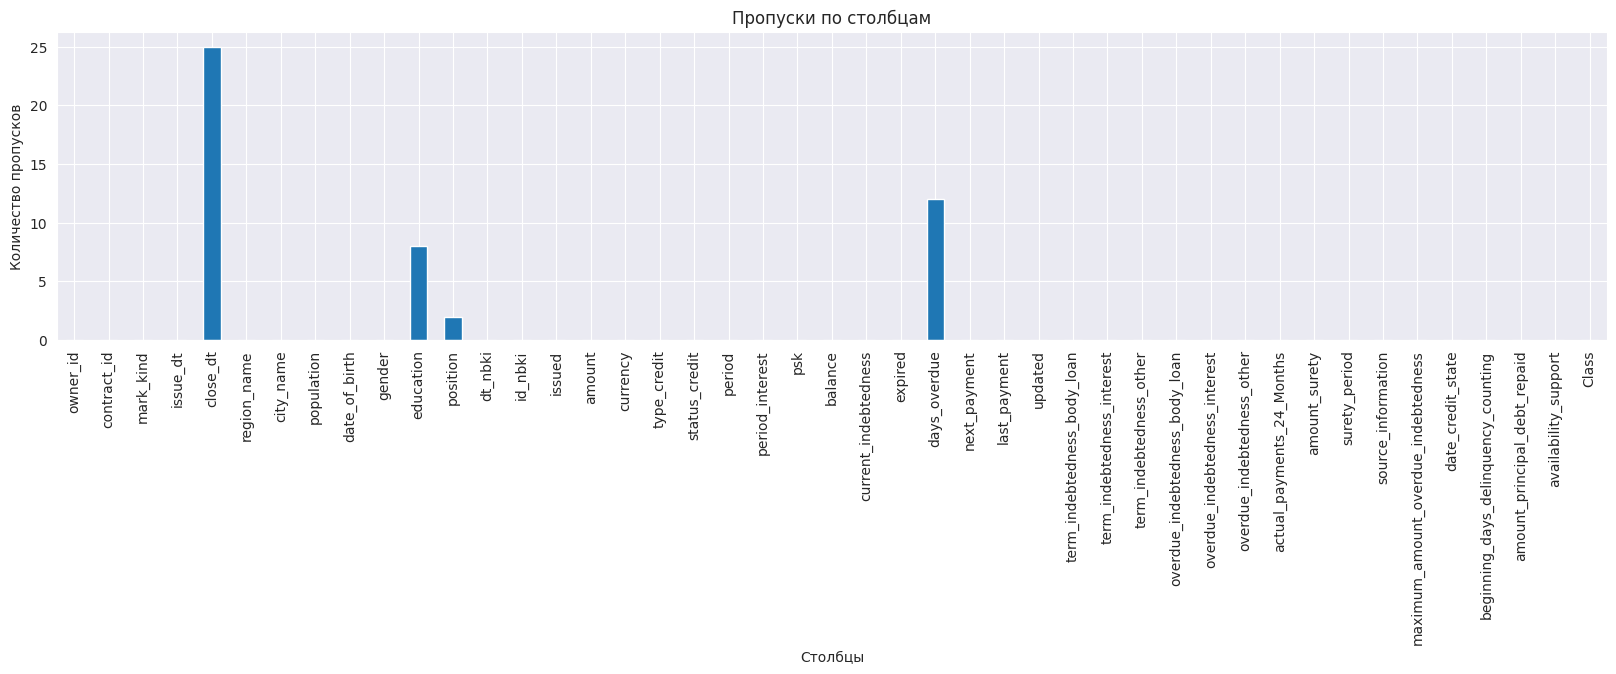

In [ ]:
missing_percentages = round(db.isnull().mean() * 100)
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

In [ ]:
db["dt_nbki"].unique()

array(['2021-10-27', '2022-02-16', '2021-07-20', ...,
       Timestamp('2022-10-29 00:00:00'), Timestamp('2022-10-27 00:00:00'),
       Timestamp('2023-01-02 00:00:00')], dtype=object)

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
db['dt_nbki'] = pd.to_datetime(db['dt_nbki'])
db = db[db['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [ ]:
db.shape

(3495506, 45)

#Перевод данных типа объект в категории

In [ ]:
db.isna().sum()

owner_id                                    0
contract_id                                 0
mark_kind                                   0
issue_dt                                    0
close_dt                               840601
region_name                               600
city_name                                 600
population                                600
date_of_birth                               0
gender                                      0
education                              313810
position                                86867
dt_nbki                                     0
id_nbki                                     0
issued                                    586
amount                                    586
currency                                  588
type_credit                              1412
status_credit                            1269
period                                    586
period_interest                           586
psk                               

In [ ]:
# Удаляем строки с пропусками
db = db.dropna (subset=['region_name'])
db = db.dropna (subset=['amount_surety'])

In [ ]:
db.isna().sum()

owner_id                                    0
contract_id                                 0
mark_kind                                   0
issue_dt                                    0
close_dt                               840024
region_name                                 0
city_name                                   0
population                                  0
date_of_birth                               0
gender                                      0
education                              313809
position                                86867
dt_nbki                                     0
id_nbki                                     0
issued                                      0
amount                                      0
currency                                    2
type_credit                               826
status_credit                             683
period                                      0
period_interest                             0
psk                               

In [ ]:
db = db.drop(['days_overdue'], axis='columns') # Удаляем колонку 'days_overdue' в db

In [ ]:
db.shape

(3494319, 44)

In [ ]:
obj_db = db.select_dtypes(include=['object']).copy()

In [ ]:
obj_db.dtypes

owner_id                               object
contract_id                            object
mark_kind                              object
issue_dt                               object
close_dt                               object
region_name                            object
city_name                              object
date_of_birth                          object
gender                                 object
education                              object
position                               object
id_nbki                                object
issued                                 object
currency                               object
type_credit                            object
status_credit                          object
period                                 object
period_interest                        object
last_payment                           object
updated                                object
surety_period                          object
source_information                

In [ ]:
db['owner_id'].isnull().sum()

0

In [ ]:
db["owner_id"] = db["owner_id"].astype('category')
db["owner_id"] = db["owner_id"].cat.codes

In [ ]:
db['contract_id'].isnull().sum()

0

In [ ]:
db["contract_id"] = db["contract_id"].astype('category')
db["contract_id"] = db["contract_id"].cat.codes

In [ ]:
db['mark_kind'].isnull().sum()

0

In [ ]:
db["mark_kind"] = db["mark_kind"].astype('category')
db["mark_kind"] = db["mark_kind"].cat.codes

In [ ]:
db['issue_dt'].isnull().sum()

0

In [ ]:
db["issue_dt"] = db["issue_dt"].astype('category')
db["issue_dt"] = db["issue_dt"].cat.codes

In [ ]:
db['close_dt'] = db['close_dt'].fillna(db['issue_dt']) # Заменяем NaN на дату из столбца 'issue_dt'

In [ ]:
db['close_dt'].isnull().sum()

0

In [ ]:
db["close_dt"] = db["close_dt"].astype('category')
db["close_dt"] = db["close_dt"].cat.codes

In [ ]:
db['region_name'].isnull().sum()

0

In [ ]:
db["region_name"] = db["region_name"].astype('category')
db["region_name"] = db["region_name"].cat.codes

In [ ]:
db['city_name'].isnull().sum()

0

In [ ]:
db["city_name"] = db["city_name"].astype('category')
db["city_name"] = db["city_name"].cat.codes

In [ ]:
db['date_of_birth'].isnull().sum()

0

In [ ]:
db["date_of_birth"] = db["date_of_birth"].astype('category')
db["date_of_birth"] = db["date_of_birth"].cat.codes

In [ ]:
db['gender'].isnull().sum()

0

In [ ]:
db["gender"] = db["gender"].astype('category')
db["gender"] = db["gender"].cat.codes

In [ ]:
# Пустые значения
db['education'] = db['education'].fillna('Неполное')
db['education'].isnull().sum()

0

In [ ]:
db["education"] = db["education"].astype('category')
db["education"] = db["education"].cat.codes

In [ ]:
# Пустые значения
db['position'] = db['position'].fillna('прочее')
db['position'].isnull().sum()

0

In [ ]:
db["position"] = db["position"].astype('category')
db["position"] = db["position"].cat.codes

In [ ]:
db['dt_nbki'].isnull().sum()

0

In [ ]:
db["dt_nbki"] = db["dt_nbki"].astype('category')
db["dt_nbki"] = db["dt_nbki"].cat.codes

In [ ]:
db["dt_nbki"].unique()

array([296, 406, 197, 221, 385, 526,  76,  37, 157, 216, 276, 307, 337,
       432,  49, 127, 142,  59, 399, 435, 469, 517, 579, 312, 411, 429,
       491, 521, 137, 547,   9,  36,  61, 123,  65, 185, 254, 138, 202,
        15, 310, 396, 459, 346, 556, 528, 554, 616,  23,  57, 102, 222,
       255, 285, 515, 280,  50,  89, 100, 516, 548,  21,  56,  83, 113,
       511, 546, 597,  20, 434,  34,  46,  75, 213, 320, 525, 588, 675,
       143,  12, 117,   1,  96, 219, 465, 696,  52, 170, 186, 203, 291,
       407, 471, 129, 191, 252, 282, 492, 184, 211, 240, 174, 214, 278,
       309, 375,  67,  39,  91, 122, 151, 277,  54, 311, 273, 304, 334,
       394, 483, 514, 527, 587, 618, 370, 360,  97,  81, 295, 327, 352,
       364, 427, 509, 519, 537, 539, 555, 557, 596, 601, 436, 259, 495,
       608, 144, 168, 199, 239, 266, 351,  73, 132, 358, 377, 437, 470,
       504, 559, 325, 506, 523, 552, 583, 101, 163, 220,  11, 160, 247,
       341,  77, 275, 110, 215, 314, 501,  80, 114, 175,  86, 19

In [ ]:
db['id_nbki'].isnull().sum()

0

In [ ]:
db["id_nbki"] = db["id_nbki"].astype('category')
db["id_nbki"] = db["id_nbki"].cat.codes

In [ ]:
db['issued'].isnull().sum()

0

In [ ]:
db["issued"] = db["issued"].astype('category')
db["issued"] = db["issued"].cat.codes

In [ ]:
# Пустые значения
db['type_credit'] = db['type_credit'].fillna('ДругойТипКредита')
db['type_credit'].isnull().sum()

0

In [ ]:
db["type_credit"] = db["type_credit"].astype('category')
db["type_credit"] = db["type_credit"].cat.codes

In [ ]:
db = db.dropna (subset=['status_credit'])
db['status_credit'].isnull().sum()

0

In [ ]:
db["status_credit"] = db["status_credit"].astype('category')
db["status_credit"] = db["status_credit"].cat.codes

<ipython-input-90-9953f17efecd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["status_credit"] = db["status_credit"].astype('category')
<ipython-input-90-9953f17efecd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["status_credit"] = db["status_credit"].cat.codes


In [ ]:
db['period'] = db['period'].fillna('2100-01-01')
db['period'].isnull().sum()

<ipython-input-86-9856d691a32e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['period'] = db['period'].fillna('2100-01-01')


0

In [ ]:
db["period"] = db["period"].astype('category')
db["period"] = db["period"].cat.codes

<ipython-input-91-02ce85a4fd2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["period"] = db["period"].astype('category')
<ipython-input-91-02ce85a4fd2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["period"] = db["period"].cat.codes


In [ ]:
db["period_interest"] = db["period_interest"].astype('category')
db["period_interest"] = db["period_interest"].cat.codes

<ipython-input-92-ec9b6c40f16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["period_interest"] = db["period_interest"].astype('category')
<ipython-input-92-ec9b6c40f16a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["period_interest"] = db["period_interest"].cat.codes


In [ ]:
# Пустые значения
db['last_payment'] = db['last_payment'].fillna('2017-01-01')
db['last_payment'].isnull().sum()

<ipython-input-94-22fd6c0e2921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['last_payment'] = db['last_payment'].fillna('2017-01-01')


0

In [ ]:
db["last_payment"] = db["last_payment"].astype('category')
db["last_payment"] = db["last_payment"].cat.codes

<ipython-input-95-aaae7a18ae12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["last_payment"] = db["last_payment"].astype('category')
<ipython-input-95-aaae7a18ae12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["last_payment"] = db["last_payment"].cat.codes


In [ ]:
db['updated'].isnull().sum()

0

In [ ]:
db["updated"] = db["updated"].astype('category')
db["updated"] = db["updated"].cat.codes

<ipython-input-97-9049fdeb0b35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["updated"] = db["updated"].astype('category')
<ipython-input-97-9049fdeb0b35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["updated"] = db["updated"].cat.codes


In [ ]:
db["surety_period"] = db["surety_period"].astype('category')
db["surety_period"] = db["surety_period"].cat.codes

<ipython-input-102-e41511d8dd7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["surety_period"] = db["surety_period"].astype('category')
<ipython-input-102-e41511d8dd7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["surety_period"] = db["surety_period"].cat.codes


In [ ]:
db['source_information'].isnull().sum()

0

In [ ]:
db["source_information"] = db["source_information"].astype('category')
db["source_information"] = db["source_information"].cat.codes

<ipython-input-100-96bea183c508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["source_information"] = db["source_information"].astype('category')
<ipython-input-100-96bea183c508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["source_information"] = db["source_information"].cat.codes


In [ ]:
db = db.dropna (subset=['date_credit_state'])
db['date_credit_state'].isnull().sum()

0

In [ ]:
db["date_credit_state"] = db["date_credit_state"].astype('category')
db["date_credit_state"] = db["date_credit_state"].cat.codes

In [ ]:
db["beginning_days_delinquency_counting"] = db["beginning_days_delinquency_counting"].astype('category')
db["beginning_days_delinquency_counting"] = db["beginning_days_delinquency_counting"].cat.codes

In [ ]:
db['availability_support'].isnull().sum()

0

In [ ]:
db["availability_support"] = db["availability_support"].astype('category')
db["availability_support"] = db["availability_support"].cat.codes

In [ ]:
db = db.drop(columns='currency')#удаление столбца валюта

In [ ]:
db.head()

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
0,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10351,25000.0,12,0,15290,13892,200.75,0.0,29400.0,0.0,29400.0,6424,7589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9654,9430,0.0,0,1
1,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,8885,331710.0,19,12,15237,13839,19.00,474295.0,0.0,0.0,0.0,9670,7568,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,1523,0,0.0,9633,9409,0.0,0,1
2,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10294,28840.0,12,12,15211,13813,255.50,31263.0,0.0,0.0,0.0,9644,7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9607,9383,0.0,0,1
3,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10279,15000.0,12,12,15192,13794,365.00,15960.0,0.0,0.0,0.0,9625,7526,0.0,0.0,0.0,0.0,0.0,0.0,50832.0,0.0,1523,8,0.0,9591,9357,0.0,0,1
4,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10285,15000.0,12,12,15222,13824,200.75,15165.0,0.0,0.0,0.0,9625,7523,15000.0,165.0,0.0,0.0,0.0,0.0,15165.0,0.0,1523,8,0.0,9588,9362,0.0,0,1


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493636 entries, 0 to 751943
Data columns (total 43 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int16  
 1   contract_id                          int32  
 2   mark_kind                            int8   
 3   issue_dt                             int16  
 4   close_dt                             int16  
 5   region_name                          int8   
 6   city_name                            int16  
 7   population                           float64
 8   date_of_birth                        int16  
 9   gender                               int8   
 10  education                            int8   
 11  position                             int8   
 12  dt_nbki                              int16  
 13  id_nbki                              int16  
 14  issued                               int16  
 15  amount                           

In [ ]:
db.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/df_all_cod_16-08.csv', index=False)

#Оценка важности данных

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/df_all_cod_16-08.csv')

In [ ]:
#db_val = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_val_4bal_cod1.csv')

<ipython-input-5-cdc19ddd4837>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  db_val = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_val_4bal_cod1.csv')


In [ ]:
#db_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_test_4bal_cod1.csv')

In [ ]:
#db.shape, db_val.shape, db_test.shape

((77807, 33), (103802, 33), (122118, 33))

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493636 entries, 0 to 3493635
Data columns (total 43 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   mark_kind                            int64  
 3   issue_dt                             int64  
 4   close_dt                             int64  
 5   region_name                          int64  
 6   city_name                            int64  
 7   population                           float64
 8   date_of_birth                        int64  
 9   gender                               int64  
 10  education                            int64  
 11  position                             int64  
 12  dt_nbki                              int64  
 13  id_nbki                              int64  
 14  issued                               int64  
 15  amount                          

In [ ]:
# Split the dataset into features and target
X = db.drop('Class', axis=1)
y = np.array(db['Class'])

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns.values)):
    feature_scores[X.columns.values[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

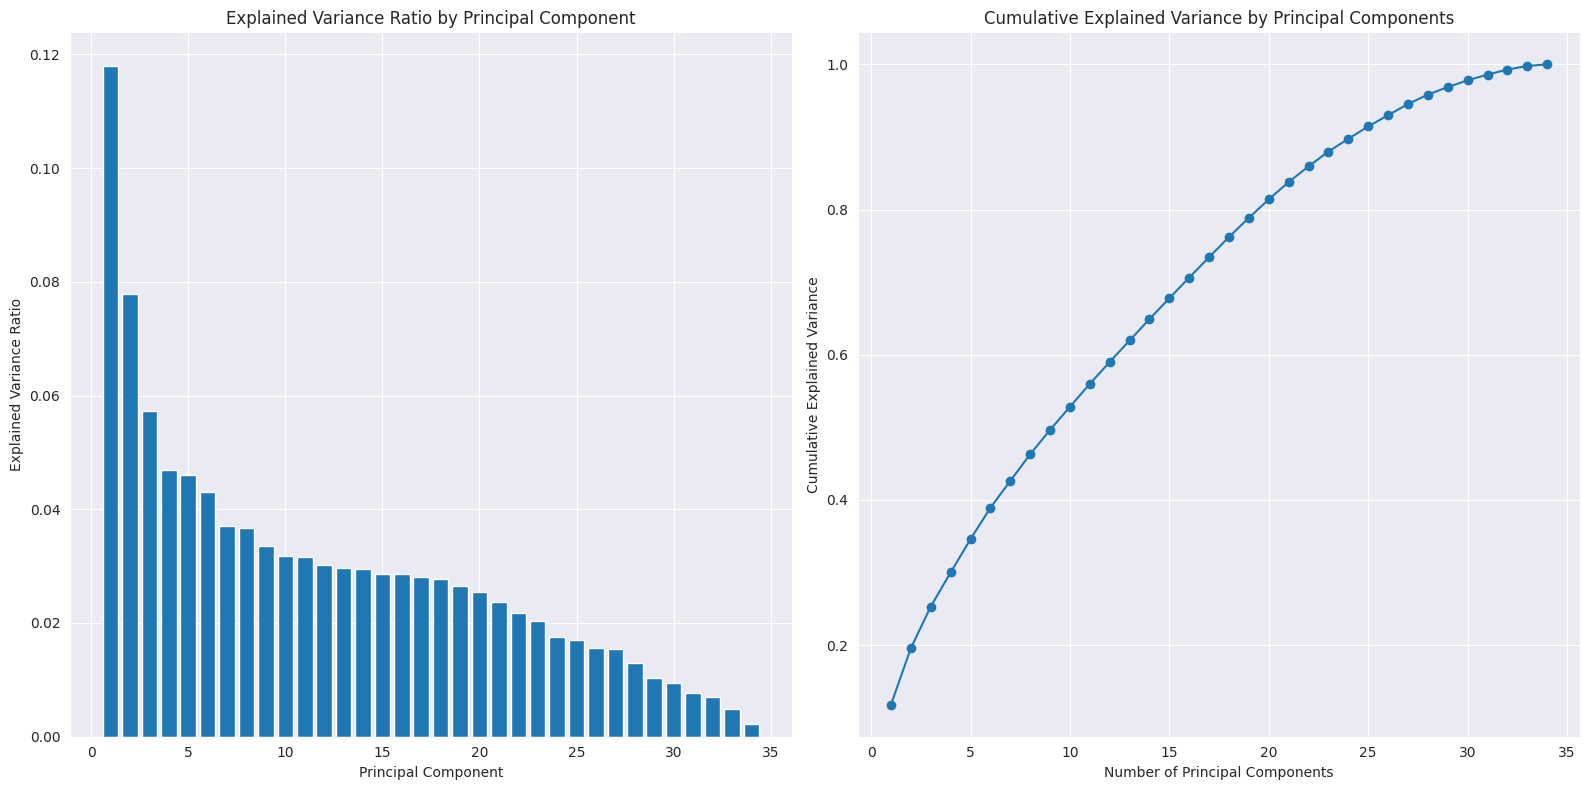

In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

## Корреляция

In [ ]:
db = db.reset_index(drop=True)

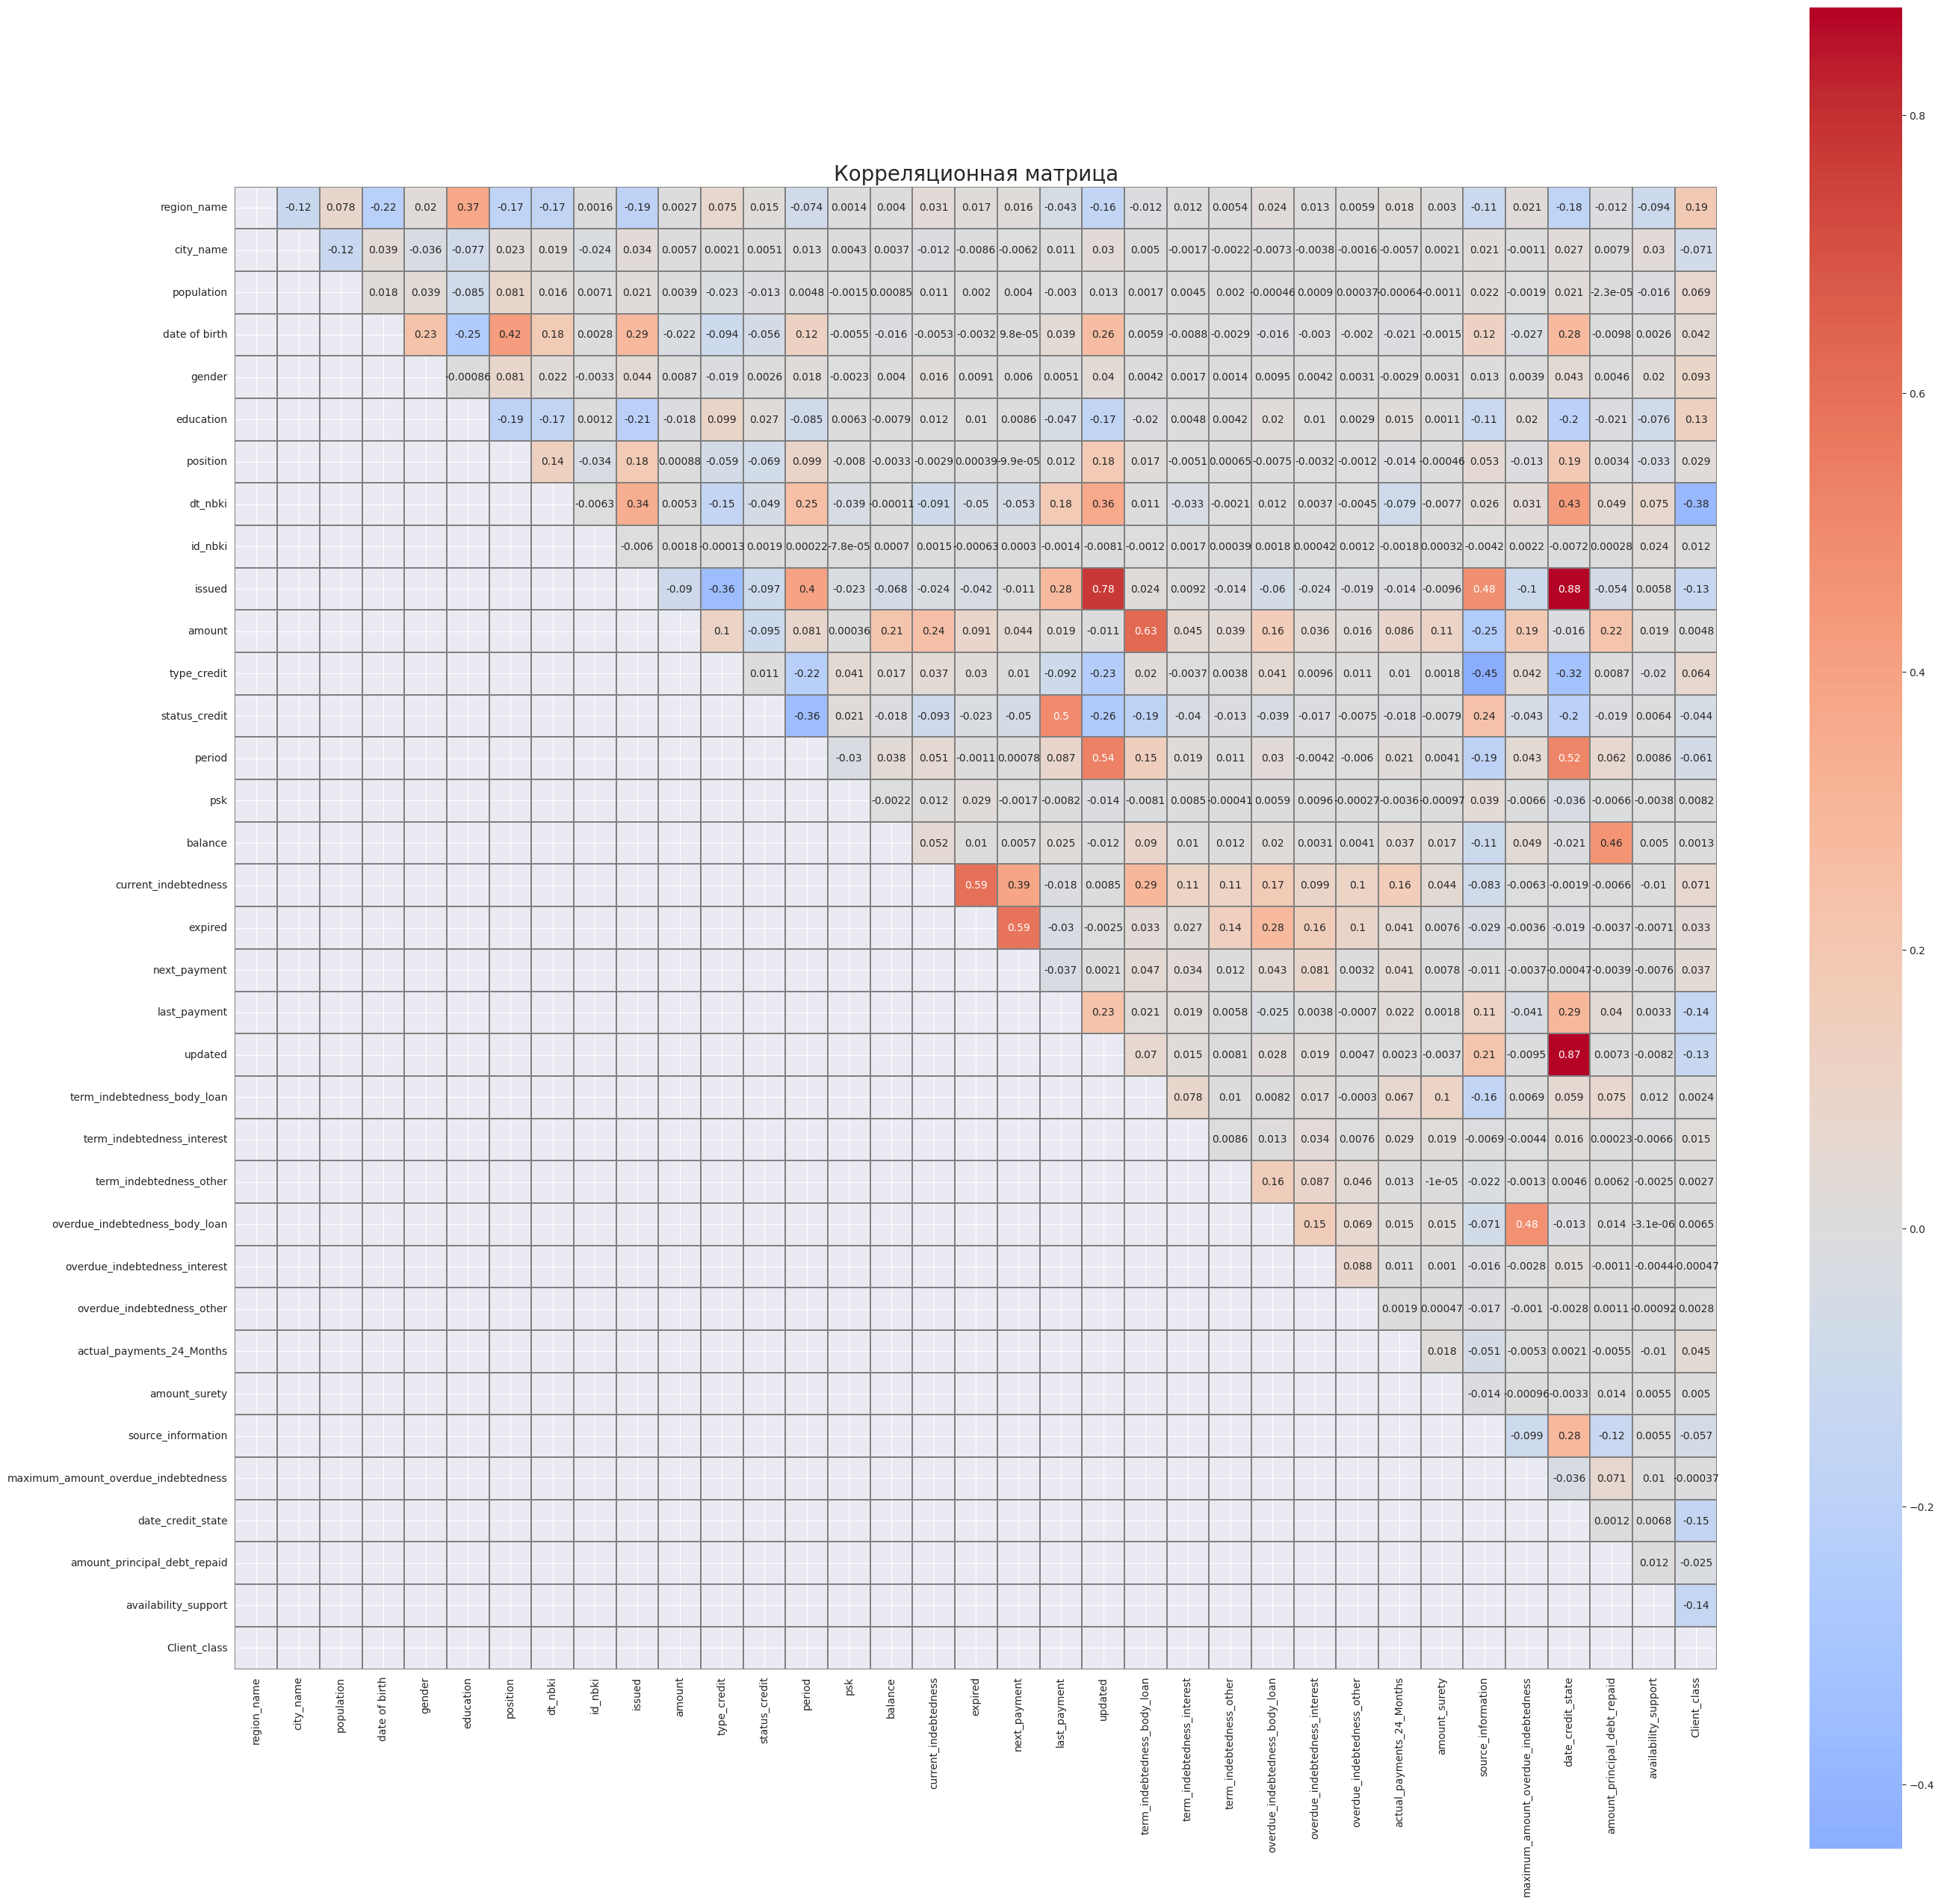

In [ ]:
# Таблица корреляции признаков
mask_1 = np.tril(db.corr())
plt.figure(figsize=(32,32))
sns.heatmap(db.corr(), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

In [ ]:
spearman_correlation = db.corr(method='spearman')
spearman_correlation

,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
region_name,1.000000,-0.115885,-0.285546,-0.255710,0.020824,0.345298,-0.221629,-0.153996,0.008629,-0.280586,...,0.057167,0.046968,0.119952,0.012963,-0.135695,0.067419,-0.245012,-0.199013,-0.058688,0.276410
city_name,-0.115885,1.000000,-0.025740,0.030893,-0.037536,-0.047650,0.015230,0.006081,-0.025647,0.041088,...,-0.015092,-0.013221,-0.025697,0.001896,0.019649,-0.000710,0.034677,0.035637,0.015467,-0.060870
population,-0.285546,-0.025740,1.000000,0.170809,0.054611,-0.339464,0.187670,0.112586,0.006054,0.186576,...,-0.018244,-0.017667,-0.060424,-0.020670,0.092650,-0.052551,0.165742,0.109165,0.010247,-0.114200
date of birth,-0.255710,0.030893,0.170809,1.000000,0.220957,-0.205157,0.429446,0.143933,0.004556,0.310794,...,0.009536,0.004014,-0.053657,-0.015828,0.126221,-0.058433,0.283907,0.049541,-0.041111,-0.024825
gender,0.020824,-0.037536,0.054611,0.220957,1.000000,-0.008318,0.100745,0.016368,-0.003292,0.040582,...,0.015157,0.010149,0.003100,-0.005471,0.011797,-0.015069,0.033898,-0.029482,0.007146,0.077958
education,0.345298,-0.047650,-0.339464,-0.205157,-0.008318,1.000000,-0.152926,-0.090638,-0.003713,-0.203587,...,0.027958,0.022281,0.051941,0.011749,-0.102936,0.056288,-0.177991,-0.134216,-0.016812,0.126382
position,-0.221629,0.015230,0.187670,0.429446,0.100745,-0.152926,1.000000,0.117643,-0.036288,0.237192,...,-0.001401,-0.005319,-0.052104,-0.012035,0.059116,-0.047664,0.225605,0.062451,-0.062267,-0.031503
dt_nbki,-0.153996,0.006081,0.112586,0.143933,0.016368,-0.090638,0.117643,1.000000,-0.022277,0.445017,...,0.006316,-0.020354,-0.317677,-0.031542,0.041386,0.048712,0.512019,0.510181,0.033985,-0.541006
id_nbki,0.008629,-0.025647,0.006054,0.004556,-0.003292,-0.003713,-0.036288,-0.022277,1.000000,-0.007615,...,0.000275,-0.001037,0.001726,0.000021,-0.004534,0.001200,-0.008217,0.001718,0.020444,0.015349
issued,-0.280586,0.041088,0.186576,0.310794,0.040582,-0.203587,0.237192,0.445017,-0.007615,1.000000,...,-0.004550,-0.021722,-0.084859,-0.024673,0.402678,-0.192720,0.914652,0.133376,-0.026275,-0.287122


In [ ]:
db['Class'].unique()

array([1, 2, 3, 4])

##Деление базы на trein/val/test по id_nkbi

In [ ]:
from pandas.io.parsers.readers import read_csv
db = read_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/df_all_cod_16-08.csv')

In [ ]:
#test
def split(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_test = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_test


db_train, db_test = split(db, 'db')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| db        | 31076               | 6215              | (2806445, 43) | (687191, 43) |
+-----------+---------------------+-------------------+---------------+--------------+



In [ ]:
#val
def split1(db, name):

  # Получаем уникальные значения из db
  db_unique_len = db['id_nbki'].nunique()
  db_unique = db['id_nbki'].unique()

  # Выбираем 20% случайных значений из db_unique
  db_sample = np.random.choice(db_unique, size=int(0.2*len(db_unique)), replace=False)

  # Фильтруем db по значениям в db_sample
  db_val = db[db['id_nbki'].isin(db_sample)]
  # Фильтруем db по значениям, которых нет в db_sample
  db_train = db[~db['id_nbki'].isin(db_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, db_unique_len, db_sample.shape[0], db_train.shape, db_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return db_train, db_val


db_train, db_val = split1(db_train, 'db')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Val          |
+-----------+---------------------+-------------------+---------------+--------------+
| db        | 24861               | 4972              | (2245406, 43) | (561039, 43) |
+-----------+---------------------+-------------------+---------------+--------------+



In [ ]:
db_train.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_train_16-08_all.csv', index=False)

In [ ]:
db_val.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_val_2021_16-08_all.csv', index=False)

In [ ]:
db_test.to_csv('/content/gdrive/MyDrive/Стажировка Скоринг/Red/New/db_test_2021_16-08_all.csv', index=False)

## перевод в numpy_array

Разбиваем данные на X и Y

In [ ]:
db = pd.read_csv('C:/AI/Scoring/Red/New/db_train_16-08_all.csv')

In [ ]:
db_val = pd.read_csv('C:/AI/Scoring/Red/New/db_val_2021_16-08_all.csv')

In [ ]:
db_test = pd.read_csv('C:/AI/Scoring/Red/New/db_test_2021_16-08_all.csv')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245406 entries, 0 to 2245405
Data columns (total 43 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   mark_kind                            int64  
 3   issue_dt                             int64  
 4   close_dt                             int64  
 5   region_name                          int64  
 6   city_name                            int64  
 7   population                           float64
 8   date_of_birth                        int64  
 9   gender                               int64  
 10  education                            int64  
 11  position                             int64  
 12  dt_nbki                              int64  
 13  id_nbki                              int64  
 14  issued                               int64  
 15  amount                          

In [ ]:
db_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561039 entries, 0 to 561038
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             561039 non-null  int64  
 1   contract_id                          561039 non-null  int64  
 2   mark_kind                            561039 non-null  int64  
 3   issue_dt                             561039 non-null  int64  
 4   close_dt                             561039 non-null  int64  
 5   region_name                          561039 non-null  int64  
 6   city_name                            561039 non-null  int64  
 7   population                           561039 non-null  float64
 8   date_of_birth                        561039 non-null  int64  
 9   gender                               561039 non-null  int64  
 10  education                            561039 non-null  int64  
 11  position     

In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687191 entries, 0 to 687190
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   owner_id                             687191 non-null  int64  
 1   contract_id                          687191 non-null  int64  
 2   mark_kind                            687191 non-null  int64  
 3   issue_dt                             687191 non-null  int64  
 4   close_dt                             687191 non-null  int64  
 5   region_name                          687191 non-null  int64  
 6   city_name                            687191 non-null  int64  
 7   population                           687191 non-null  float64
 8   date_of_birth                        687191 non-null  int64  
 9   gender                               687191 non-null  int64  
 10  education                            687191 non-null  int64  
 11  position     

In [ ]:
db.head(10)


,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
0,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10351,25000.0,12,0,15290,13892,200.75,0.0,29400.0,0.0,29400.0,6424,7589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9654,9430,0.0,0,1
1,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,8885,331710.0,19,12,15237,13839,19.00,474295.0,0.0,0.0,0.0,9670,7568,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,1523,0,0.0,9633,9409,0.0,0,1
2,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10294,28840.0,12,12,15211,13813,255.50,31263.0,0.0,0.0,0.0,9644,7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9607,9383,0.0,0,1
3,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10279,15000.0,12,12,15192,13794,365.00,15960.0,0.0,0.0,0.0,9625,7526,0.0,0.0,0.0,0.0,0.0,0.0,50832.0,0.0,1523,8,0.0,9591,9357,0.0,0,1
4,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10285,15000.0,12,12,15222,13824,200.75,15165.0,0.0,0.0,0.0,9625,7523,15000.0,165.0,0.0,0.0,0.0,0.0,15165.0,0.0,1523,8,0.0,9588,9362,0.0,0,1
5,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10271,15210.0,12,12,15191,13793,255.50,16807.0,0.0,0.0,0.0,9624,7522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9587,9363,0.0,0,1
6,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10231,28840.0,12,12,15153,13755,255.50,32272.0,0.0,0.0,0.0,9586,7493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9549,9325,0.0,0,1
7,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10241,30000.0,12,12,15154,13756,365.00,31200.0,0.0,0.0,0.0,9587,7487,0.0,0.0,0.0,0.0,0.0,0.0,34872.0,0.0,1523,8,0.0,9552,9322,0.0,0,1
8,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10245,30000.0,12,12,15182,13784,200.75,30660.0,0.0,0.0,0.0,9587,7485,30000.0,660.0,0.0,0.0,0.0,0.0,30660.0,0.0,1523,8,0.0,9550,9322,0.0,0,1
9,0,22969,1,1248,0,2,770,11103.0,14740,1,6,14,296,23502,10224,10000.0,12,12,15164,13766,200.75,11155.0,0.0,0.0,0.0,9583,7482,10000.0,1155.0,0.0,0.0,0.0,0.0,11155.0,0.0,1523,8,0.0,9546,9322,0.0,0,1


In [ ]:
db = db.sample(frac=1)
db_val = db_val.sample(frac=1)
db_test = db_test.sample(frac=1)

In [ ]:
db.head(10)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Class
1256875,7557,30310,1,719,1655,52,735,12941.0,650,0,5,6,151,15408,5134,3150.0,12,12,4888,4884,365.000,3497.0,0.0,0.0,0.0,4829,4370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.0,4815,4810,0.0,0,2
902294,342,6543,1,1752,273,24,45,61915.0,14602,0,6,6,525,16896,7439,50000.0,19,12,12643,11242,62.513,77459.0,0.0,0.0,0.0,7111,6590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,0,0.0,7049,7037,0.0,0,1
1682852,23893,17889,1,736,1059,56,505,291663.0,10675,0,6,18,561,25612,6362,7490.0,12,0,6121,6117,365.000,0.0,7490.0,0.0,0.0,1,4839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.0,6032,6038,0.0,0,3
834655,339,16869,1,1562,111,13,300,85344.0,14566,0,6,6,130,5788,9022,6042.0,19,12,13949,12551,237.250,7141.0,0.0,0.0,0.0,8392,7367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8350,8135,0.0,0,1
51601,28,22406,1,1889,227,23,356,64176.0,14660,0,5,6,213,10033,9533,11016.0,12,12,14465,13067,244.904,13307.0,0.0,0.0,0.0,8900,7368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8859,8643,0.0,0,1
7268,8,1124,1,1637,64,7,302,27788.0,14659,0,5,6,59,29985,8693,7144.0,19,12,13622,12223,7201.000,7201.0,0.0,0.0,0.0,8042,6216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,7997,7793,0.0,0,1
707140,323,22730,1,1413,5,59,316,23114.0,14629,0,5,6,193,22930,9961,8720.0,12,12,14895,13497,365.000,10900.0,0.0,0.0,0.0,9324,7224,0.0,0.0,0.0,0.0,0.0,0.0,10900.0,0.0,1523,8,0.0,9287,9067,0.0,0,1
662604,307,837,1,1121,271,45,764,8193.0,14788,0,6,6,524,11621,10125,2150.0,12,12,15038,13640,328.500,2305.0,0.0,0.0,0.0,9471,7369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9434,9202,0.0,0,1
1028709,367,12432,1,1170,294,23,689,29809.0,14691,0,6,5,59,8277,9518,8240.0,12,12,14433,13035,355.149,9473.0,0.0,0.0,0.0,8869,6788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,8828,8611,0.0,0,1
1006743,367,11971,1,1578,148,23,689,29809.0,14691,0,6,5,29,28247,9721,10300.0,12,12,14655,13257,365.000,13596.0,0.0,0.0,0.0,9090,6993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1523,8,0.0,9051,8833,0.0,0,1


In [ ]:
X = db.drop('Class', axis=1)
y = np.array(db['Class'])

In [ ]:
X_val = db_val.drop('Class', axis=1)
y_val = np.array(db_val['Class'])

In [ ]:
X_test = db_test.drop('Class', axis=1)
y_test = np.array(db_test['Class'])

In [ ]:
y = np.subtract(y, 1) #если классы идут с 1

In [ ]:
y_val = np.subtract(y_val, 1)

In [ ]:
y_test = np.subtract(y_test, 1)

In [ ]:
X, y

(         owner_id  contract_id  mark_kind  issue_dt  close_dt  region_name  \
 1256875      7557        30310          1       719      1655           52   
 902294        342         6543          1      1752       273           24   
 1682852     23893        17889          1       736      1059           56   
 834655        339        16869          1      1562       111           13   
 51601          28        22406          1      1889       227           23   
 ...           ...          ...        ...       ...       ...          ...   
 1585882      3058         2434          1       497      1605            9   
 1862963      2129         5668          0       880      2725            2   
 1877024      3165        14255          0       869      2280            2   
 1486569     15300        25786          1        18      1878           58   
 1106163      2313        24793          1       252      1291            5   
 
          city_name  population  date_of_birth  ge

In [ ]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(X)
x = scaler.transform(X)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[0.90527955 2.96581121 3.36548446 ... 1.62471197 0.         0.        ]
 [0.04096938 0.64022774 3.36548446 ... 2.37694347 0.         0.        ]
 [2.86222633 1.7504255  3.36548446 ... 2.0395033  0.         0.        ]
 ...
 [0.37914646 1.39484127 0.         ... 0.         0.12555216 0.        ]
 [1.8328407  2.52314114 3.36548446 ... 1.75340537 0.         0.        ]
 [0.27708239 2.42597682 3.36548446 ... 1.78853428 0.         0.        ]]
[0 1 2 3]


In [ ]:

scaler.fit(X_val)
x_val = scaler.transform(X_val)
print(x_val) # Посмотрим на нормализованные данные
print(np.unique(y_val))

[[0.01295793 2.16400937 3.56616696 ... 3.07688241 0.         0.        ]
 [0.03840684 0.62739206 3.56616696 ... 2.52745129 0.         0.        ]
 [0.02591586 2.95535199 3.56616696 ... 3.14637029 0.         0.        ]
 ...
 [0.33608904 2.62893056 3.56616696 ... 1.83291313 0.         0.        ]
 [2.53858707 1.3666493  3.56616696 ... 1.89933536 0.         0.        ]
 [2.75163413 0.17302605 3.56616696 ... 1.9517919  0.         0.        ]]
[0 1 2 3]


In [ ]:

scaler.fit(X_test)
x_test = scaler.transform(X_test)
print(x_test) # Посмотрим на нормализованные данные
print(np.unique(y_test))

[[0.20729105 1.58793633 3.44137262 ... 1.85136332 0.         0.        ]
 [0.03094971 2.97452417 3.44137262 ... 2.68524893 0.         0.        ]
 [1.28141377 1.33019458 3.44137262 ... 1.49035605 0.         0.        ]
 ...
 [1.71698889 0.17359319 3.44137262 ... 1.83935262 0.         0.        ]
 [2.38756584 0.73164134 3.44137262 ... 2.05794733 0.         0.        ]
 [0.02267246 1.09098905 3.44137262 ... 3.16087257 0.         0.        ]]
[0 1 2 3]


In [ ]:
from keras.utils import to_categorical

In [ ]:
print(np.unique(y))

[0 1 2 3]


In [ ]:
# Преобразование ответов в формат one_hot_encoding
y = to_categorical(y, num_classes = 4)

In [ ]:
y_val = to_categorical(y_val, num_classes = 4)

In [ ]:
y_test = to_categorical(y_test, num_classes = 4)

In [ ]:
print('Размер y_test:', y_test.shape)

Размер y_test: (687191, 4)


#Модель 2

In [ ]:
number_of_cols = x.shape[1]

model22_cl = Sequential() # Последовательная модель нейронной сети

model22_cl.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model22_cl.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model22_cl.add(BatchNormalization())
model22_cl.add(Dropout(0.2))
model22_cl.add(Dense(4, activation='softmax'))

model22_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               22016     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 155396 (607.02 KB)
Trainable params: 154884 (605.02 KB)
Non-trainable params: 512 (2.00 KB)
________________

In [ ]:
model22_cl.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x.shape, y.shape

((2245406, 42), (2245406, 4))

Epoch 1/100
35085/35085 [==============================] - 104s 3ms/step - loss: 0.2155 - accuracy: 0.9027 - val_loss: 0.2150 - val_accuracy: 0.9051
Epoch 2/100
35085/35085 [==============================] - 96s 3ms/step - loss: 0.1830 - accuracy: 0.9152 - val_loss: 0.2530 - val_accuracy: 0.9021
Epoch 3/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1688 - accuracy: 0.9225 - val_loss: 0.2652 - val_accuracy: 0.8979
Epoch 4/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1559 - accuracy: 0.9295 - val_loss: 0.2477 - val_accuracy: 0.8997
Epoch 5/100
35085/35085 [==============================] - 97s 3ms/step - loss: 0.1440 - accuracy: 0.9358 - val_loss: 0.2526 - val_accuracy: 0.8989
Epoch 6/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1328 - accuracy: 0.9416 - val_loss: 0.2727 - val_accuracy: 0.8939
Epoch 7/100
35085/35085 [==============================] - 95s 3ms/step - loss: 0.1232 - accuracy: 0.9466 - val

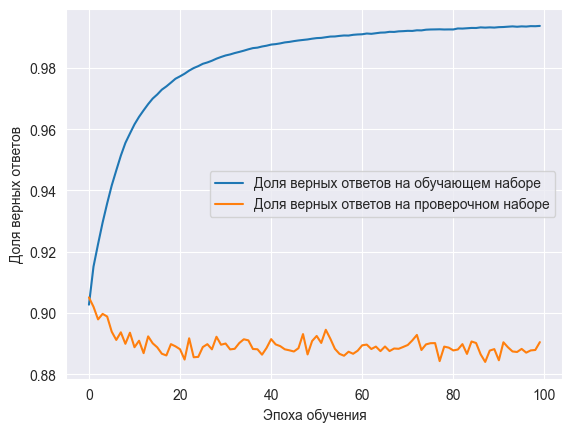

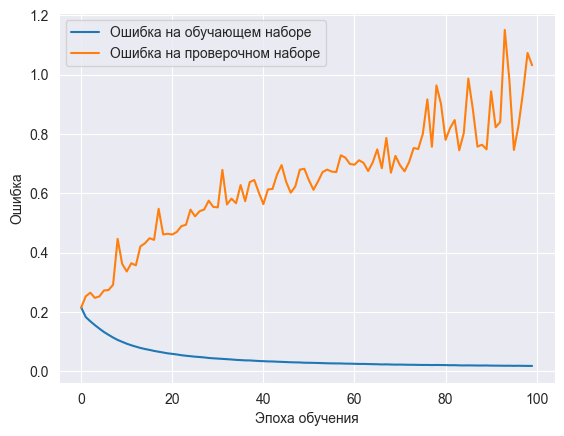

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model22_cl.fit(x,                            # Обучающая выборка
                        y,                               # Метки классов обучающей выборки
                        epochs=100,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения

print('Максимальное значение accuracy:', max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model22_cl.save('C:/AI/Scoring/Red/model2_all_3.keras')

In [ ]:
loss, acc = model22_cl.evaluate(x_test, y_test, verbose=1) #classification

21475/21475 [==============================] - 26s 1ms/step - loss: 0.8350 - accuracy: 0.8914


In [ ]:
loss

0.8349577188491821

In [ ]:
acc

0.8913984894752502

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

21475/21475 [==============================] - 27s 1ms/step
[[315535     43     26      0]
 [     9 151211  10734    378]
 [     2  16440  38439  29733]
 [     0    847  16418 107376]]


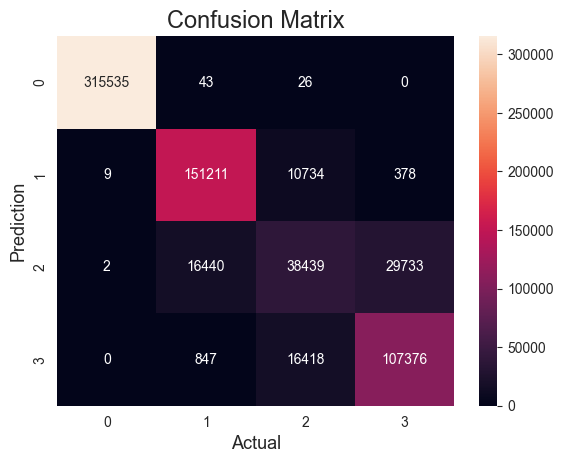

Accuracy   : 0.8913984612720481


In [ ]:
# compute the confusion matrix
y_pred=model22_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)